# Capstone Project on Classification of COVID-19 Diagnosis

## Introduction

In this big worldwide problem caused by COVID-19, it's really important for doctors to quickly and correctly find out if someone has the virus. Technology and healthcare working together can help solve this problem. Our special project, where we have used Python and Machine Learning, is a part of this solution. We're trying to make it easier and faster for doctors to tell if someone has COVID-19. It's like using smart tools to help doctors do their job better. 

In this endeavor, we embark on a journey to leverage the power of Python programming and advanced machine learning techniques. Our goal is to create a sophisticated system that can efficiently classify COVID-19 cases based on various diagnostic factors. By harnessing the capabilities of machine learning algorithms, we aim to provide healthcare professionals with a reliable tool that enhances the accuracy and speed of COVID-19 diagnoses.

### Dataset Description

A. Basic information: 

1. **Ind_ID:** Patient's individual ID.
2. **Test_date:** The date when test was conducted for COVID
3. **Sex:** male or female. 
4. **Age_60_above:** Is the patient older than 60yrs (Yes/No).

B. Symptoms: 

5. **Cough_symptoms:** If the patient is having cough symptoms (true/false).
6. **Fever:** If the patient is having Fever (true/false). 
7. **Sore_throat:** Having Sore throat or not (true/false). 
8. **Shortness_of_breath:** If the patient has Shortness of breath (true/false). 
9. **Headache:** Having Headache or not (true/false). 

C. Other information: 

10. **Known_contact:** If the patient has came in contact with an individual confirmed to have COVID-19.

D. Covid report

11. **Corona:** Whether the result is COVID positive or negative. This is the Target Variable.

**1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?** 

Using machine learning to accurately predict diseases, especially COVID-19, is incredibly vital today. Detecting diseases early based on symptoms is crucial for hospitals to isolate and treat patients promptly. This swift action is essential in preventing the disease from spreading further. By using advanced technology, doctors can make quicker and more precise diagnoses, ensuring timely care for patients. In the fight against COVID-19, early detection plays a central role, helping healthcare professionals to curb the spread of the virus effectively. Harnessing the power of machine learning, we pave the way for proactive healthcare, saving lives and safeguarding communities from the rapid transmission of diseases.

**2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden?** 

Machine learning will help doctors find diseases early, like COVID-19, quickly and accurately. When diseases are spotted early, doctors can treat patients faster and stop the diseases from spreading. This not only helps sick people get better but also reduces the pressure on hospitals of testing and screening. These computer programs can look at a lot of information fast, helping doctors make decisions quickly. So, it means people don't have to wait long for their turn, and doctors can use their time and resources better.

**3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease?**

Poor or missing data can be a challenge for these models. But if it helps with COVID-19, we could use this tool to understand new diseases. So, even if a different disease shows up in the future, this tool can quickly analyze information and assist doctors. It's like having a super helper for any health problem we might face. This way, we're ready to tackle new diseases and keep people healthy.

## Hypothesis

Based on the dataset provided, we can propose the following null and alternative hypotheses:

**Null Hypothesis 1(H0)**: There is no significant relationship between known contact with confirmed COVID-19 positive patients (variable: Known_contact) and the likelihood of testing corona positive.

**Alternative Hypothesis 1(H1)**: Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test COVID-19 positive.

**Null Hypothesis 2(H0)**: There is no significant relationship between symptoms such as shortness of breath, fever, and cough (variables: Shortness_of_breath, Fever, Cough_symptoms) and the likelihood of a person being COVID-19 positive or negative.

**Alternative Hypothesis 2(H1)**: Symptoms such as Shortness_of_breath, fever, and cough are important factors in predicting COVID-19 positive cases.

These hypotheses provide a clear framework for statistical analysis. The null hypotheses state that there is no relationship, while the alternative hypotheses suggest specific relationships between variables. Further analysis and modeling will be necessary to either accept or reject these hypotheses and draw conclusive insights regarding COVID-19 prediction from the dataset.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics._plot.roc_curve import auc

In [2]:
# Load the data
dataset = pd.read_csv(r"C:\Users\Kirti Ranjan\Desktop\OdinSchool\Python\Capstone Project\Corona-Dataset\corona_tested_006.csv")
dataset.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [3]:
#Check any 10 samples from the observations
dataset.sample(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
261422,261423,28-04-2020,False,False,False,False,False,negative,None,male,Other
198633,198634,20-04-2020,False,False,False,False,False,negative,None,female,Other
123409,123410,09-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
5277,5278,17-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,None,Other
265976,265977,28-04-2020,False,False,False,False,False,negative,None,male,Other
235519,235520,24-04-2020,True,True,False,False,False,negative,None,female,Abroad
124496,124497,09-04-2020,FALSE,FALSE,True,False,False,positive,No,male,Other
8166,8167,19-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,None,Other
53124,53125,29-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other
152452,152453,14-04-2020,False,False,False,False,False,negative,No,female,Other


In [4]:
dataset.shape

(278848, 11)

The dataset has 278848 number of observations and 11 features.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Except for the 'Ind_ID' column, all other features have a data type of object.

In [6]:
#Check null values
dataset.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

The dataset contains neither missing values nor duplicate values.

In [8]:
dataset.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In the dataset, the 'Ind_ID' column has 278,848 unique values, the 'Test_date' column has 51 unique values, and 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', and 'Headache' each have 5 unique values. Additionally, 'Corona', 'Age_60_above', 'Sex', and 'Known_contact' contain 3 unique values.

In [9]:
# Checking Unique values in each column(except Ind_ID and Test_date)
for column in dataset.columns:
    if column == 'Ind_ID' or column == 'Test_date':
        pass
    else:
        print('----------------------')
        print("**%s**" %column)
        print(dataset[column].value_counts())

----------------------
**Cough_symptoms**
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
----------------------
**Fever**
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
----------------------
**Sore_throat**
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
----------------------
**Shortness_of_breath**
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
----------------------
**Headache**
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
----------------------
**Corona**
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
----------------------
**Age_60_above**
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
-----

In the dataset, the columns 'Cough_symptoms,' 'Fever,' 'Sore_throat,' 'Shortness_of_breath,' and 'Headache' contain values such as TRUE, True, FALSE, False, and none. The symptoms are expected to be either true or false; it cannot be 'none.' Therefore, replacing the 'none' values with null. Additionally, 'True' and 'False' are written in both uppercase and lowercase letters (i.e., TRUE, True, FALSE, False), which impacts the total count of unique values in these columns.

In [10]:
covid_data = dataset.copy()

In [11]:
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Iterate through specified columns and apply replacements
for column in columns_to_replace:
    covid_data[column] = covid_data[column].apply(lambda x: 'TRUE' if x is True else ('FALSE' if x is False else (np.nan if x == 'None' else x)))

In [12]:
# Checking Unique values in each column

for column in covid_data.columns:
    if column == 'Ind_ID' or column == 'Test_date':
        pass
    else:
        print('----------------------')
        print("**%s**" %column)
        print(covid_data[column].value_counts())

----------------------
**Cough_symptoms**
FALSE    236368
TRUE      42228
Name: Cough_symptoms, dtype: int64
----------------------
**Fever**
FALSE    256844
TRUE      21752
Name: Fever, dtype: int64
----------------------
**Sore_throat**
FALSE    276921
TRUE       1926
Name: Sore_throat, dtype: int64
----------------------
**Shortness_of_breath**
FALSE    277270
TRUE       1577
Name: Shortness_of_breath, dtype: int64
----------------------
**Headache**
FALSE    276433
TRUE       2414
Name: Headache, dtype: int64
----------------------
**Corona**
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
----------------------
**Age_60_above**
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
----------------------
**Sex**
female    130158
male      129127
None       19563
Name: Sex, dtype: int64
----------------------
**Known_contact**
Other                     242741
Abroad                     25468
Contact with confirmed     10639

We have replaced the uppercase value with lowercase (i.e., TRUE as True and FALSE as False) and 'none' values with null.

In [13]:
covid_data.isnull().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Age_60_above             0
Sex                      0
Known_contact            0
dtype: int64

After replacing the 'none' values with null, 'Cough_symptoms' and 'Fever' each have 252 missing values, while 'Sore_throat,' 'Shortness_of_breath,' and 'Headache' each have 1 missing value.

In [14]:
round(covid_data.isnull().mean()*100,2)

Ind_ID                 0.00
Test_date              0.00
Cough_symptoms         0.09
Fever                  0.09
Sore_throat            0.00
Shortness_of_breath    0.00
Headache               0.00
Corona                 0.00
Age_60_above           0.00
Sex                    0.00
Known_contact          0.00
dtype: float64

In [15]:
covid_data.dropna(inplace=True)

In [16]:
covid_data.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

We have removed all the missing values from their respective columns.

In [17]:
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [18]:
covid_data.shape

(278594, 11)

After removing all the missing values, the dataset is left with 278,594 observations and 11 features.

In [19]:
covid_data.to_csv(r"C:\Users\Kirti Ranjan\Desktop\OdinSchool\Python\Capstone Project\Corona-Dataset\Corona_Dataset.csv")

## Univariate Analysis

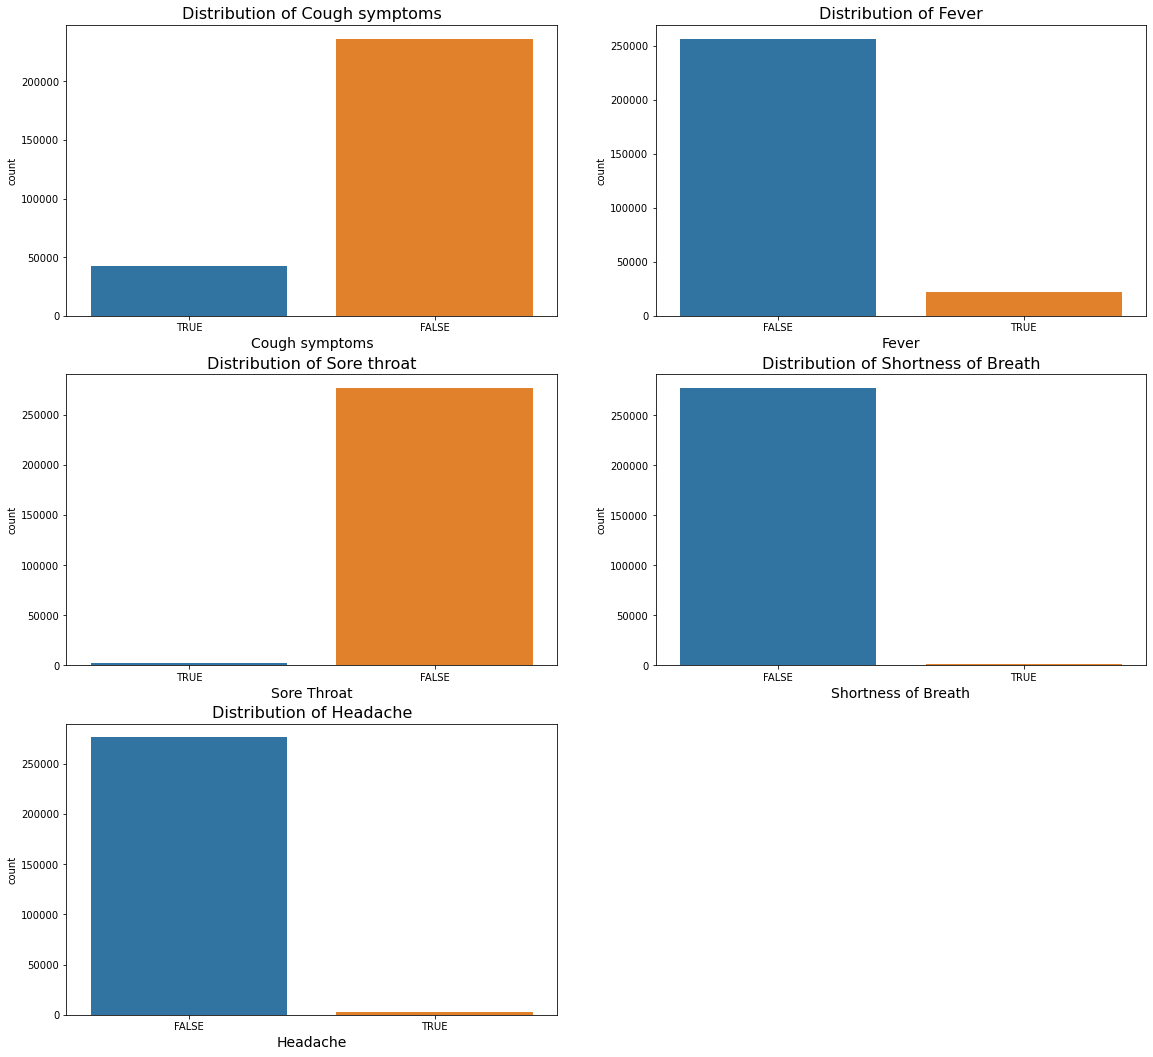

In [20]:
plt.figure(figsize=(8, 10))

plt.subplot(3,2,1)
sns.countplot(x='Cough_symptoms', data=covid_data)
plt.title('Distribution of Cough symptoms', fontsize = 16)
plt.xlabel('Cough symptoms', fontsize = 14)

plt.subplot(3,2,2)
sns.countplot(x='Fever', data=covid_data)
plt.title('Distribution of Fever', fontsize = 16)
plt.xlabel('Fever', fontsize = 14)

plt.subplot(3,2,3)
sns.countplot(x='Sore_throat', data=covid_data)
plt.title('Distribution of Sore throat', fontsize = 16)
plt.xlabel('Sore Throat', fontsize = 14)

plt.subplot(3,2,4)
sns.countplot(x='Shortness_of_breath', data=covid_data)
plt.title('Distribution of Shortness of Breath', fontsize = 16)
plt.xlabel('Shortness of Breath', fontsize = 14)

plt.subplot(3,2,5)
sns.countplot(x='Headache', data=covid_data)
plt.title('Distribution of Headache', fontsize = 16)
plt.xlabel('Headache', fontsize = 14)

plt.subplots_adjust(right=2.0, top =1.5)
plt.show()

From the above histograms, we can see that the number of people with symptoms marked as 'True' is much lower than those with symptoms marked as 'False'.

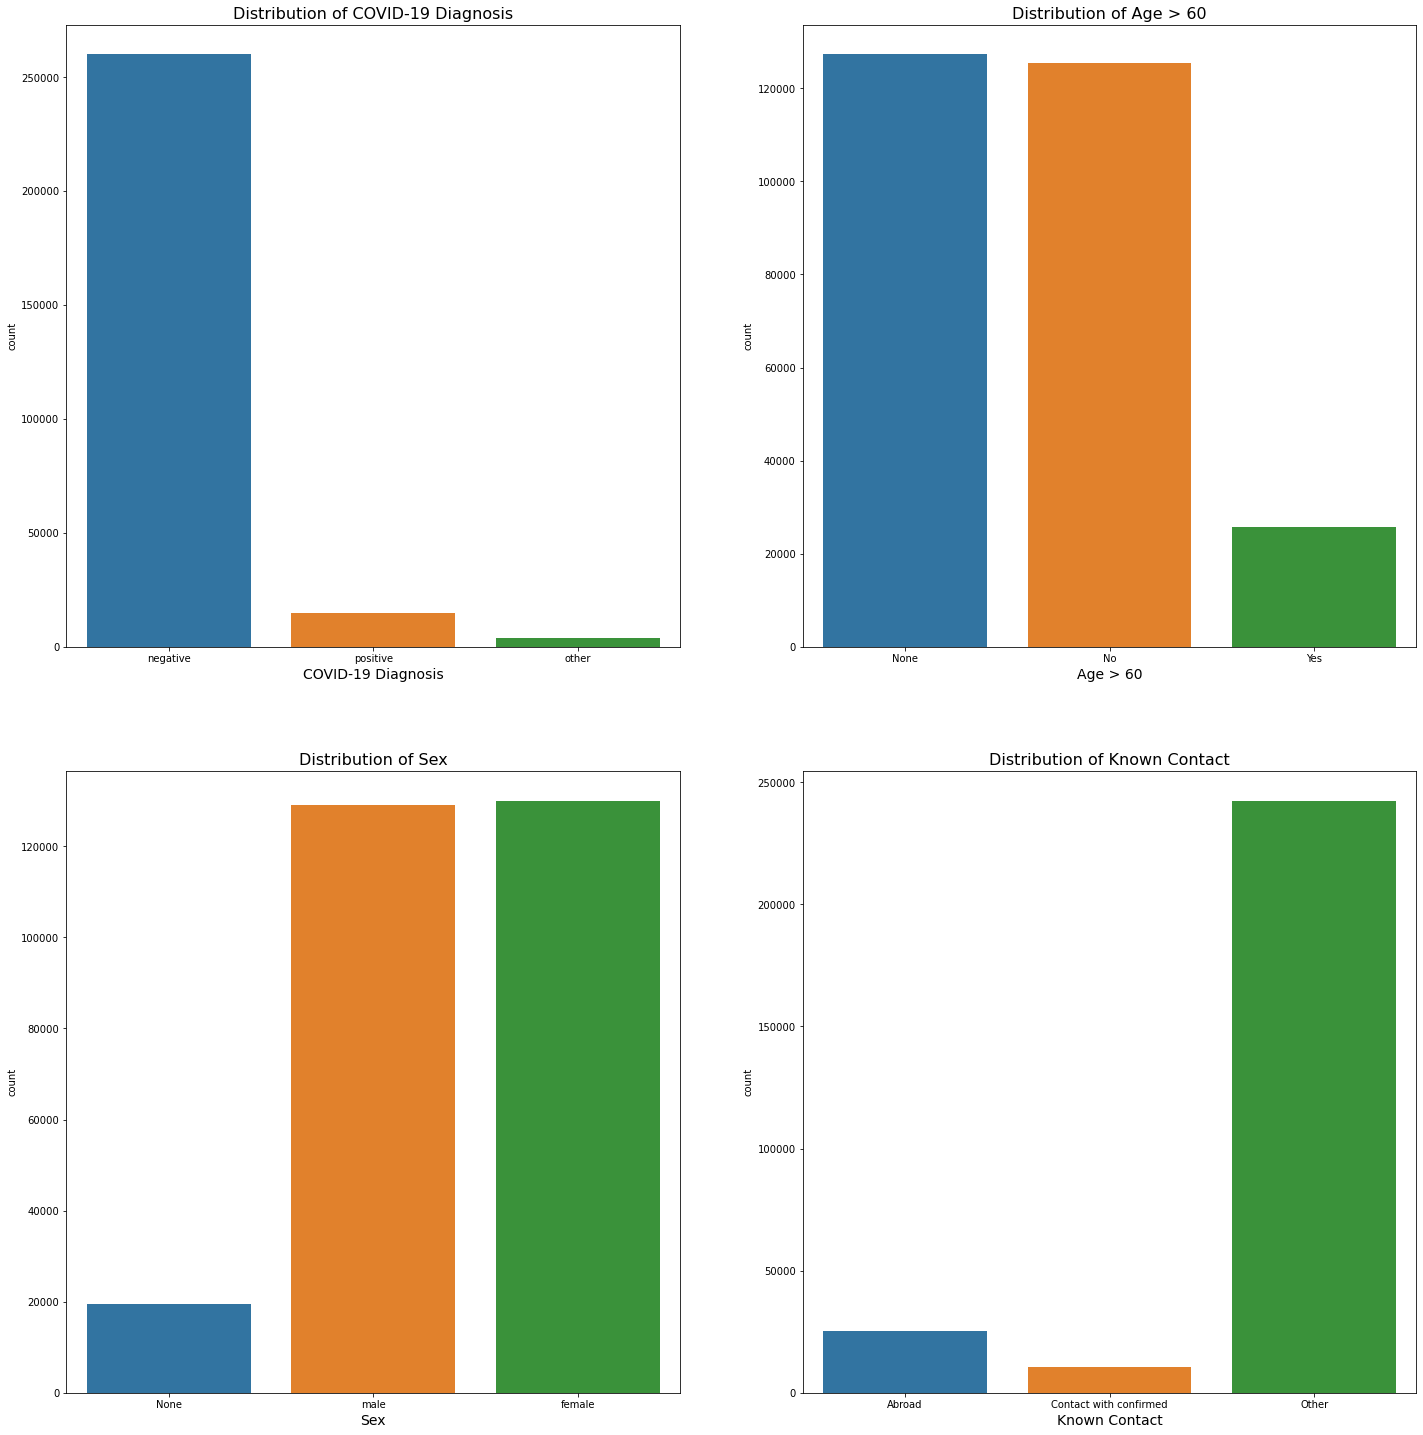

In [21]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.countplot(x='Corona', data=covid_data)
plt.title('Distribution of COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('COVID-19 Diagnosis', fontsize = 14)

plt.subplot(2,2,2)
sns.countplot(x='Age_60_above', data=covid_data)
plt.title('Distribution of Age > 60', fontsize = 16)
plt.xlabel('Age > 60', fontsize = 14)

plt.subplot(2,2,3)
sns.countplot(x='Sex', data=covid_data)
plt.title('Distribution of Sex', fontsize = 16)
plt.xlabel('Sex', fontsize = 14)

plt.subplot(2,2,4)
sns.countplot(x='Known_contact', data=covid_data)
plt.title('Distribution of Known Contact', fontsize = 16)
plt.xlabel('Known Contact', fontsize = 14)

plt.subplots_adjust(right=2.0, top =2.5)
plt.show()

1. As we have already seen, the majority of patients don't have all the symptoms. Therefore, the number of people diagnosed as COVID-19 positive is very low.

2. The majority of the patients are below 60 years of age.
3. We have almost an equal number of male and female patients.

In [22]:
covid_data['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

We have 260008 patients who tested negative for COVID-19, 14694 patients who tested positive, and 3892 patients who were tested for other diseases.

In [23]:
covid_data[covid_data.Corona=='negative'].shape[0]/covid_data[covid_data.Corona=='positive'].shape[0]

17.694841431876956

This shows that 1 out of every 17-18 patients is diagnosed as COVID-19 positive.

## Bivariate Analysis

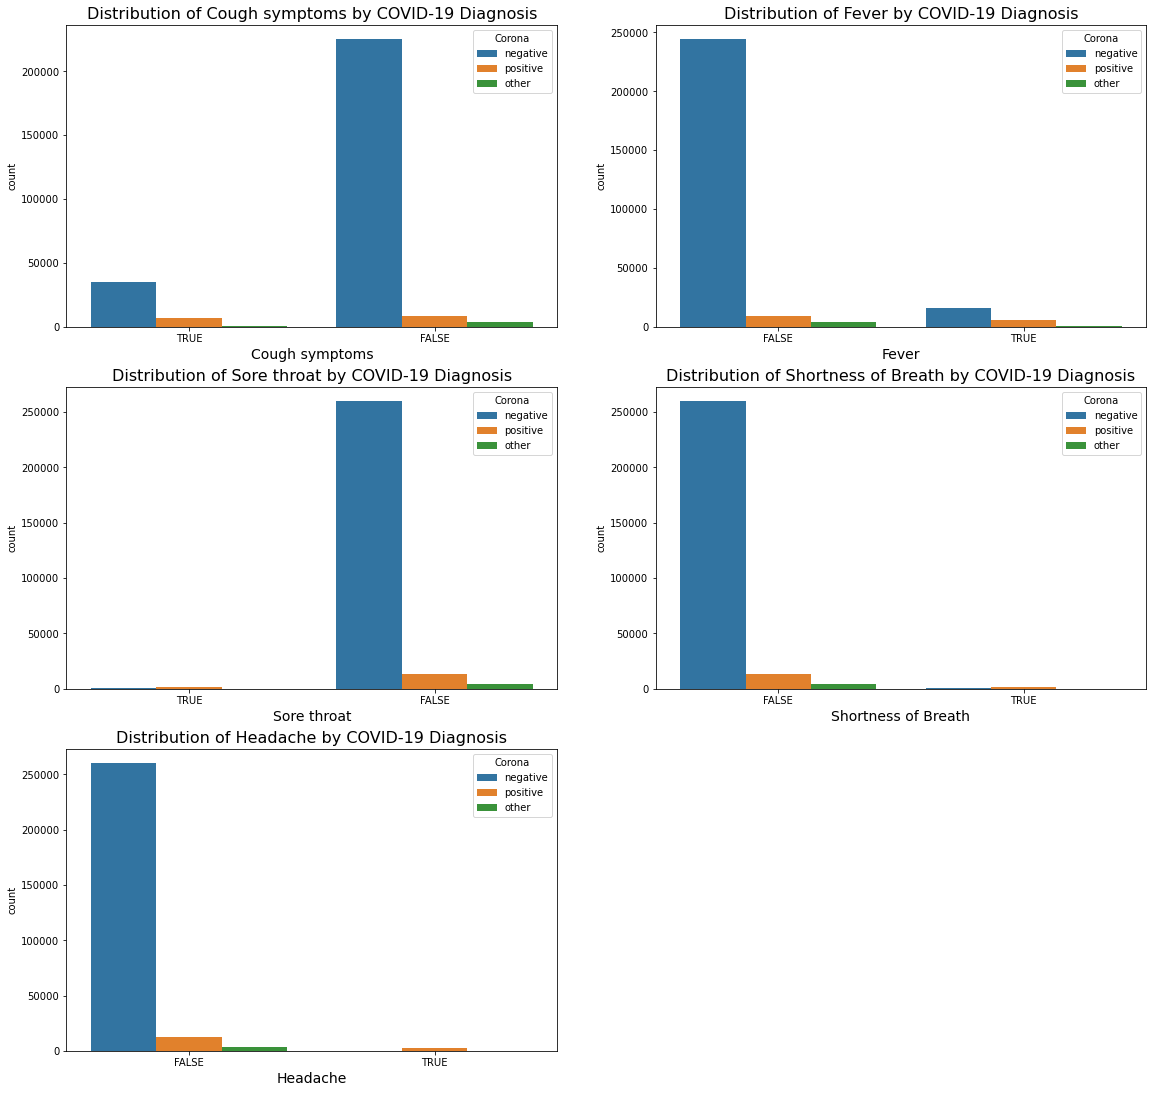

In [24]:
plt.figure(figsize=(8, 6))

plt.subplot(3,2,1)
sns.countplot(x='Cough_symptoms', data=covid_data, hue='Corona')
plt.title('Distribution of Cough symptoms by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Cough symptoms', fontsize = 14)

plt.subplot(3,2,2)
sns.countplot(x='Fever', data=covid_data, hue='Corona')
plt.title('Distribution of Fever by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Fever', fontsize = 14)


plt.subplot(3,2,3)
sns.countplot(x='Sore_throat', data=covid_data, hue='Corona')
plt.title('Distribution of Sore throat by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Sore throat', fontsize = 14)

plt.subplot(3,2,4)
sns.countplot(x='Shortness_of_breath', data=covid_data, hue='Corona')
plt.title('Distribution of Shortness of Breath by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Shortness of Breath', fontsize = 14)

plt.subplot(3,2,5)
sns.countplot(x='Headache', data=covid_data, hue='Corona')
plt.title('Distribution of Headache by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Headache', fontsize = 14)

plt.subplots_adjust(right=2.0, top =2.5)
plt.show()

From the above histogram plots, we can see that some patients without symptoms are also diagnosed with COVID-19.

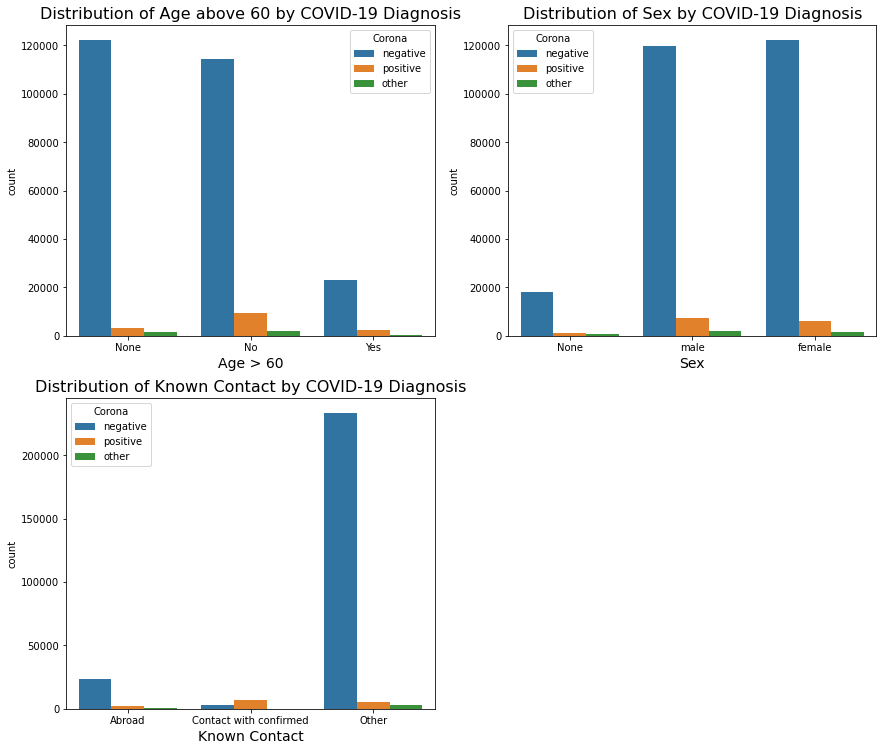

In [25]:
plt.figure(figsize=(6, 4))

plt.subplot(2,2,1)
sns.countplot(x='Age_60_above', data=covid_data, hue='Corona')
plt.title('Distribution of Age above 60 by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Age > 60', fontsize = 14)

plt.subplot(2,2,2)
sns.countplot(x='Sex', data=covid_data, hue='Corona')
plt.title('Distribution of Sex by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Sex', fontsize = 14)


plt.subplot(2,2,3)
sns.countplot(x='Known_contact', data=covid_data, hue='Corona')
plt.title('Distribution of Known Contact by COVID-19 Diagnosis', fontsize = 16)
plt.xlabel('Known Contact', fontsize = 14)

plt.subplots_adjust(right=2.0, top =2.5)
plt.show()

1. Most patients below the age of 60 are diagnosed with COVID-19 compared to those above 60 years old.
2. The number of male patients with COVID-19 is higher than that of female patients.
3. Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test COVID-19 positive.

### Feature Encoding

In [26]:
covid_ec = covid_data.copy()

In [27]:
covid_ec.drop(['Ind_ID','Test_date'],axis=1,inplace=True)

In [28]:
covid_ec['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

In [29]:
covid_ec = covid_ec[covid_ec.Corona != 'other']

As we are working on classifying the patients with COVID-19, either as negative or positive, we are excluding individuals diagnosed with other diseases.

In [30]:
covid_ec['Corona'].value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

In [31]:
covid_ec.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [32]:
covid_ec.shape

(274702, 9)

We have 9 categorical features in the dataset, and the data types for these features are currently 'object' (which usually indicates strings or textual data). Therefore, we need to convert these categorical features into integers to build the model.

In [33]:
from sklearn.preprocessing import OrdinalEncoder

# Initializing the OrdinalEncoder
encoder = OrdinalEncoder()

# Loop through the columns and encode them    
for column in covid_ec.columns:
    covid_ec[column] = encoder.fit_transform(covid_ec[[column]])

In [34]:
covid_ec.sample(10)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278418,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
214660,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
262562,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
609,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
180156,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
137513,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
227164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
104704,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
38032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


#### Correlation between the features

In [35]:
correlation = covid_ec.corr()
correlation

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.453797,0.115613,0.106330,0.116730,0.196763,-0.064512,0.032537,-0.571655
Fever,0.453797,1.000000,0.122233,0.125840,0.169774,0.266633,-0.026195,0.025874,-0.348229
Sore_throat,0.115613,0.122233,1.000000,0.195181,0.323343,0.278462,-0.036781,-0.032192,-0.088699
Shortness_of_breath,0.106330,0.125840,0.195181,1.000000,0.202082,0.233417,-0.010114,-0.039852,-0.074619
Headache,0.116730,0.169774,0.323343,0.202082,1.000000,0.367324,-0.052285,-0.008858,-0.091871
Corona,0.196763,0.266633,0.278462,0.233417,0.367324,1.000000,-0.044910,0.014648,-0.211913
Age_60_above,-0.064512,-0.026195,-0.036781,-0.010114,-0.052285,-0.044910,1.000000,0.010818,0.076329
Sex,0.032537,0.025874,-0.032192,-0.039852,-0.008858,0.014648,0.010818,1.000000,-0.020027
Known_contact,-0.571655,-0.348229,-0.088699,-0.074619,-0.091871,-0.211913,0.076329,-0.020027,1.000000


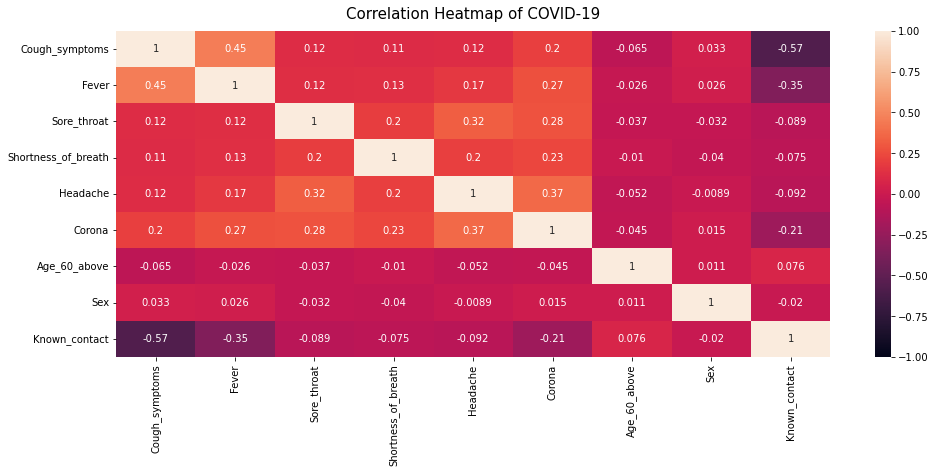

In [36]:
# plot the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap of COVID-19', fontdict={'fontsize':15}, pad=12);

A negative correlation of -0.57 can be observed between Cough_symptoms and Known_contact. This suggests that in this specific dataset, patients with cough symptoms are less likely to have a known contact with a confirmed COVID-19 patient. 

### Splitting Data into Train and Test

In [37]:
X= covid_ec.drop(['Corona'],axis=1)
y= covid_ec['Corona']

We designated the target variable as 'y' and assigned all the features to 'X'.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
print("Shape of X_train data:", X_train.shape)
print("Shape of X_test data:", X_test.shape)
print("Shape of y_train data:", y_train.shape)
print("Shape of y_test data:", y_test.shape)

Shape of X_train data: (192291, 8)
Shape of X_test data: (82411, 8)
Shape of y_train data: (192291,)
Shape of y_test data: (82411,)


We divided the independent variables (X) and dependent variables (y) into training and test sets, allocating 70% of the data for training and 30% for testing. The model will be constructed using the training data, and its performance will be assessed using the test data.

### Fearture Scaling

In [40]:
# performing Z-Score Standardization (Standardization) technique
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.42225229, -0.29036717, -0.08389638, ...,  0.55464632,
         0.98641836,  0.37088043],
       [-0.42225229, -0.29036717, -0.08389638, ...,  0.55464632,
         0.98641836,  0.37088043],
       [-0.42225229, -0.29036717, -0.08389638, ...,  0.55464632,
         0.98641836,  0.37088043],
       ...,
       [ 2.3682524 , -0.29036717, -0.08389638, ..., -0.99762555,
        -0.64068327,  0.37088043],
       [-0.42225229, -0.29036717, -0.08389638, ..., -0.99762555,
        -0.64068327,  0.37088043],
       [ 2.3682524 , -0.29036717, -0.08389638, ..., -0.99762555,
        -0.64068327, -1.30815357]])

In [41]:
X_test=sc.transform(X_test)
X_test

array([[-0.42225229, -0.29036717, -0.08389638, ...,  0.55464632,
         0.98641836,  0.37088043],
       [-0.42225229, -0.29036717, -0.08389638, ..., -0.99762555,
         0.98641836,  0.37088043],
       [ 2.3682524 ,  3.44391547, 11.91946562, ..., -0.99762555,
         0.98641836, -1.30815357],
       ...,
       [-0.42225229, -0.29036717, -0.08389638, ...,  2.1069182 ,
        -0.64068327,  0.37088043],
       [-0.42225229, -0.29036717, -0.08389638, ..., -0.99762555,
         0.98641836,  0.37088043],
       [-0.42225229, -0.29036717, -0.08389638, ...,  0.55464632,
         0.98641836,  0.37088043]])

We have applied Z-Score Standardization (also known as Standardization) to both the X_train and X_test datasets. By standardizing the features, the data is transformed to have a mean of 0 and a standard deviation of 1.

This standardization allows models to learn the data more effectively, ensuring that no particular feature dominates the learning process due to its larger scale.

### Model Building

#### Logistic Regression

In [42]:
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
# regression coefficients
print('Coefficients: ', logistic_reg.coef_)

Coefficients:  [[ 0.0724824   0.35521601  0.27122292  0.22562449  0.4382623  -0.07898069
   0.13508039 -0.33935847]]


Each value in the array corresponds to the coefficient of the respective feature in the dataset. These coefficients explain how each feature influences the likelihood of a patient being diagnosed with COVID-19 or not.

In [44]:
y_pred_lr = logistic_reg.predict(X_test)
y_pred_lr

array([0., 0., 1., ..., 0., 0., 0.])

The logistic regression model predicted the first and second patients in the test data as COVID-19 negative (0), the third patient as COVID-19 positive (1), and so on.

In [45]:
cm = confusion_matrix(y_test, y_pred_lr)
Accuracy = accuracy_score(y_test, y_pred_lr)
cr = classification_report(y_test, y_pred_lr)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.9567290774289839
Confusion Matrix
[[77818   156]
 [ 3410  1027]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     77974
         1.0       0.87      0.23      0.37      4437

    accuracy                           0.96     82411
   macro avg       0.91      0.61      0.67     82411
weighted avg       0.95      0.96      0.94     82411



From the above output we can see that, 95.67% of the patients have been predicted correctly by the Logistic Regression model.

Text(33.0, 0.5, 'Actual')

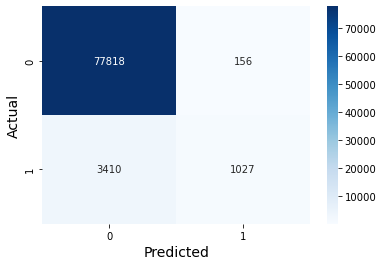

In [46]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)

As per the Confusion Matrix, 77818 patients has correctly predicted as positive, 1027 patients has correctly predicted as negative, 156 patients incorrectly predicted as positive and 3410 patients incorrectly predicted as negative.

##### Cross-Validation

In [47]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
k = 5
scores_train = cross_val_score(logistic_reg, X_train, y_train, cv=k)
scores_test = cross_val_score(logistic_reg, X_test, y_test, cv=k)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.9575912  0.95707005 0.95727807 0.95813615 0.95681003]
Cross-validation scores for Test Data:
[0.95595462 0.95607329 0.9569227  0.95643733 0.95771144]


Using 5-fold cross-validation, we cross-validated the model for both training and test data. The accuracy of each fold can be observed from the output above.

In [48]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.96
Standard deviation for Train Data: 0.00
Mean accuracy for Test Data: 0.96
Standard deviation for Test Data: 0.00


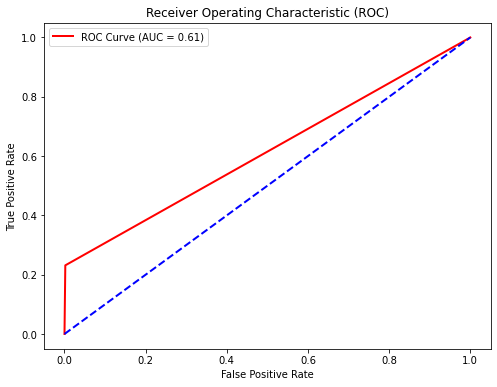

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (AUC = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

1. The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classification model's performance across different thresholds. It plots the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) for various threshold values.
2. The above ROC curve where Area under the curve(AUC) is 0.61, indicating that the model has a moderate ability to differentiate between the positive and negative cases. But, this might not be sufficient for all applications.

#### Decision Tree

In [50]:
# decision tree classification without rescaled
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dt = DecisionTree.predict(X_test)
y_pred_dt

array([0., 0., 1., ..., 0., 0., 0.])

In [52]:
cm = confusion_matrix(y_test, y_pred_dt)
Accuracy = accuracy_score(y_test, y_pred_dt)
cr = classification_report(y_test, y_pred_dt)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.968996857215663
Confusion Matrix
[[77354   620]
 [ 1935  2502]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     77974
         1.0       0.80      0.56      0.66      4437

    accuracy                           0.97     82411
   macro avg       0.89      0.78      0.82     82411
weighted avg       0.97      0.97      0.97     82411



As per the accuracy, 96.9% of the patients have been predicted correctly by Decision Tree model.

Text(33.0, 0.5, 'Actual')

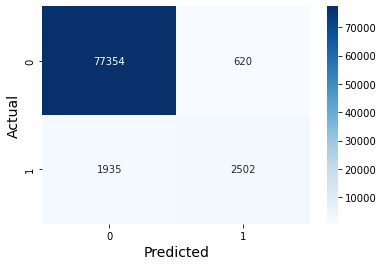

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)

From the Confusion Matrix we can see that, 77354 patients has correctly predicted as positive, 2501 patients has correctly predicted as negative, 620 patients incorrectly predicted as positive and 1936 patients incorrectly predicted as negative by the Decision Tree model.

##### Cross-Validation

In [54]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
k = 5
scores_train = cross_val_score(DecisionTree, X_train, y_train, cv=k)
scores_test = cross_val_score(DecisionTree, X_test, y_test, cv=k)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.97103409 0.96965521 0.97046128 0.96897915 0.96962921]
Cross-validation scores for Test Data:
[0.96748165 0.96790438 0.96929984 0.96905715 0.96820774]


Using 5-fold cross-validation, we cross-validated the model for both training and test data. The accuracy of each fold are almost 96%.

In [55]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.97
Standard deviation for Train Data: 0.00
Mean accuracy for Test Data: 0.97
Standard deviation for Test Data: 0.00


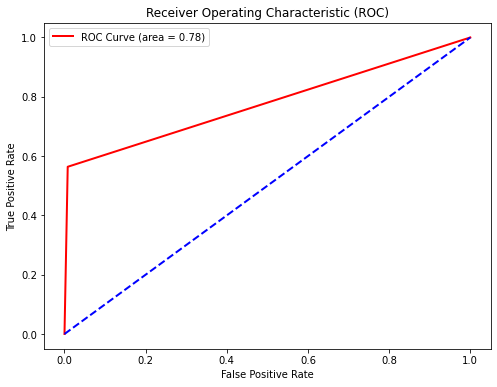

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

1. An AUC of 0.78 suggests that the Decision Tree model has a 78% chance of correctly distinguishing between positive and negative cases. The ROC curve visually represents this performance, with a higher curve indicating a better ability to classify the two classes.

#### Random Forest

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0., 0., 1., ..., 0., 0., 0.])

In [59]:
cm = confusion_matrix(y_test, y_pred_rf)
Accuracy = accuracy_score(y_test, y_pred_rf)
cr = classification_report(y_test, y_pred_rf)

print("Accuracy: ", Accuracy)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Accuracy:  0.9691303345427188
Confusion Matrix
[[77350   624]
 [ 1920  2517]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     77974
         1.0       0.80      0.57      0.66      4437

    accuracy                           0.97     82411
   macro avg       0.89      0.78      0.82     82411
weighted avg       0.97      0.97      0.97     82411



With an accuracy of 96.91%, the Random Forest model has correctly predicted the diagnosis of patients.

Text(33.0, 0.5, 'Actual')

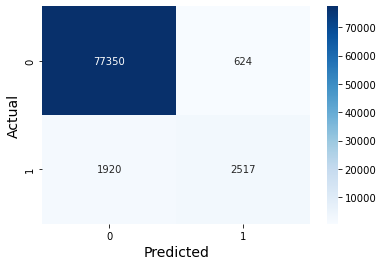

In [60]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)

As per the Confusion Matrix, 77352 patients has correctly predicted as positive, 2517 patients has correctly predicted as negative, 622 patients incorrectly predicted as positive and 1920 patients incorrectly predicted as negative by the Random Forest model.

##### Cross-Validation

In [61]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
k = 5
scores_train = cross_val_score(rf, X_train, y_train, cv=k)
scores_test = cross_val_score(rf, X_test, y_test, cv=k)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.97087808 0.9696032  0.9706433  0.96921317 0.96975922]
Cross-validation scores for Test Data:
[0.96760298 0.96832909 0.96942119 0.96911783 0.96857178]


Using 5-fold cross-validation, we cross-validated the model for both training and test data. The accuracy of each fold can be observed from the output above.

In [62]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.97
Standard deviation for Train Data: 0.00
Mean accuracy for Test Data: 0.97
Standard deviation for Test Data: 0.00


The model has secured a mean accuracy of 97% from the cross-validation for both train and test data.

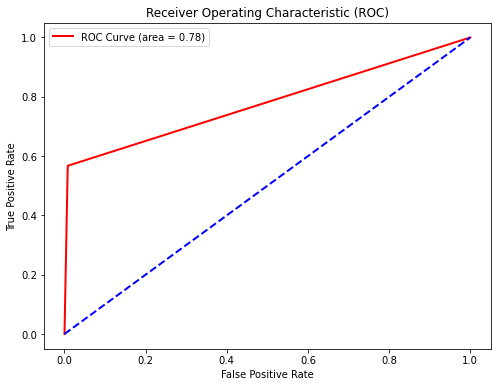

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

#### Support Vector Classifier

In [64]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [65]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0., 0., 1., ..., 0., 0., 0.])

In [66]:
# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9688755141910668
Confusion Matrix:
[[77342   632]
 [ 1933  2504]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     77974
         1.0       0.80      0.56      0.66      4437

    accuracy                           0.97     82411
   macro avg       0.89      0.78      0.82     82411
weighted avg       0.97      0.97      0.97     82411



With an accuracy of 96.89%, the SVM model has correctly predicted the diagnosis of patients.

Text(33.0, 0.5, 'Actual')

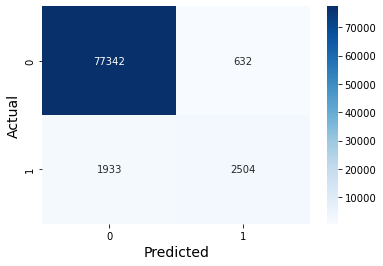

In [67]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)

The Confusion Matrix shows that 77,342 patients were correctly predicted as positive, 2,504 patients were correctly predicted as negative, 632 patients were incorrectly predicted as positive, and 1,933 patients were incorrectly predicted as negative by the Support Vector Classifier.

##### Cross-Validation

In [68]:
# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
k = 5
scores_train = cross_val_score(svm, X_train, y_train, cv=k)
scores_test = cross_val_score(svm, X_test, y_test, cv=k)

# Calculate the mean and standard deviation of the scores
mean_score_train = np.mean(scores_train)
std_score_train = np.std(scores_train)
mean_score_test = np.mean(scores_test)
std_score_test = np.std(scores_test)

# Print the scores
print("Cross-validation scores for Train Data:")
print(scores_train)
print("Cross-validation scores for Test Data:")
print(scores_test)

Cross-validation scores for Train Data:
[0.97059206 0.96934318 0.9706693  0.96900515 0.96934318]
Cross-validation scores for Test Data:
[0.96857368 0.96845043 0.96942119 0.96887514 0.9685111 ]


After performing 5-fold cross-validation, the model is still achieving almost 96% of accuracy in each fold.

In [69]:
print(f"Mean accuracy for Train Data: {mean_score_train:.2f}")
print(f"Standard deviation for Train Data: {std_score_train:.2f}")
print(f"Mean accuracy for Test Data: {mean_score_test:.2f}")
print(f"Standard deviation for Test Data: {std_score_test:.2f}")

Mean accuracy for Train Data: 0.97
Standard deviation for Train Data: 0.00
Mean accuracy for Test Data: 0.97
Standard deviation for Test Data: 0.00


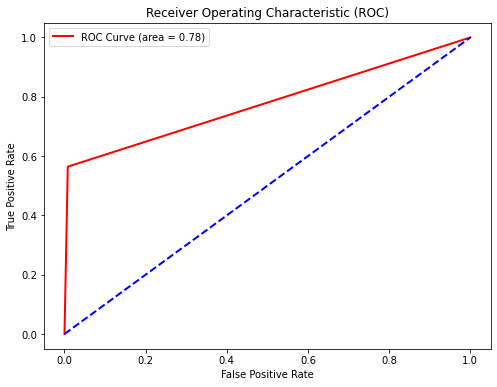

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)

#Calculate the area under the curve(AUC)
roc_auc = auc(fpr, tpr)

#plot ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'upper left')
plt.show()

Similar to the Decision Tree model, both the Random Forest and SVC models have also achieved an AUC of 0.78. This indicates that the SVC model has a 78% chance of accurately distinguishing between positive and negative cases. The ROC curve visually illustrates this performance, with a higher curve signifying a superior ability to classify the two classes.

### Conclusion

After rigorous testing and evaluation of the data using various algorithms, we have concluded that Logistic Regression yielded the lowest accuracy at 95.67%. Conversely, the SVM algorithm, Decision Tree algorithm, and Random Forest algorithm demonstrated significantly improved accuracy, approaching 97%. Therefore, any of these three models(i.e.,SVM, Decision Tree, or Random Forest) can be confidently employed for further analysis and prediction tasks based on their high accuracy levels."